### **Importing Libraries**

In [2]:
# Import required libraries
import pandas as pd  
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.linear_model import LogisticRegression  
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  

import warnings
warnings.filterwarnings('ignore')

### **Importing Dataset**

In [4]:
# Importing the Iris dataset
data = pd.read_csv("IRIS.csv")

In [5]:
# printing the first five rows of the dataset
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# getting detail information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### **Data Splitting**

In [8]:
# setting the X and Y values
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] 
Y = data['species']

In [9]:
# Split the data into training and testing sets i.e. 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [10]:
# Printing the shapes of the resulting datasets to confirm the split
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training features shape: (120, 4)
Testing features shape: (30, 4)
Training target shape: (120,)
Testing target shape: (30,)


### **Model Training and Predictions**

In [12]:
# selecting the Logistic Regression model
model = LogisticRegression(max_iter=200)

In [13]:
# Train the model using the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [14]:
# Make predictions on the test set
y_pred = model.predict(X_test)
print("Predictions on the test set:", y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Predictions on the test set: ['Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa']
Accuracy: 0.97

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



### **Classification**

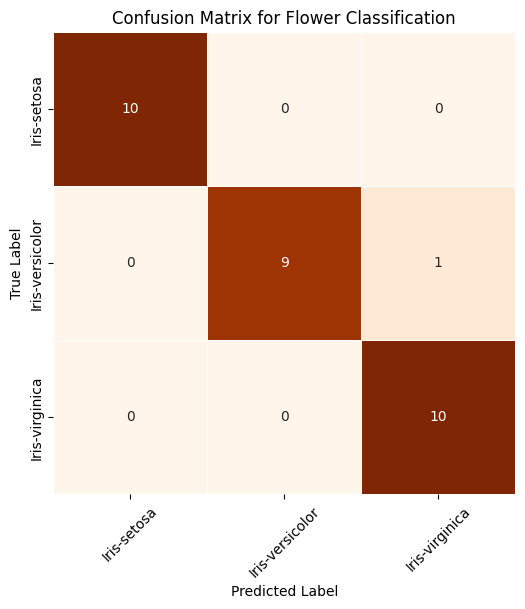

In [16]:
# Confusion Matrix for Flower Classification using Heatmap 
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=model.classes_, yticklabels=model.classes_, cbar=False, 
            linewidths=0.5, linecolor='white', square=True)

plt.xlabel("Predicted Label", fontsize=10)
plt.ylabel("True Label", fontsize=10)
plt.title("Confusion Matrix for Flower Classification", fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

plt.show()

### **Plotting**

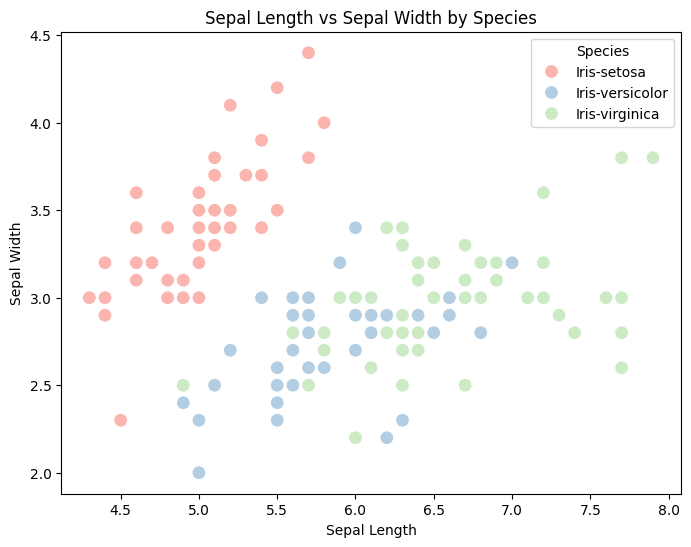

In [18]:
# Plotting Sepal Length vs Sepal Width by Species using scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='sepal_length', y='sepal_width', hue='species', palette='Pastel1', s=100)
plt.title("Sepal Length vs Sepal Width by Species")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title="Species")
plt.show()

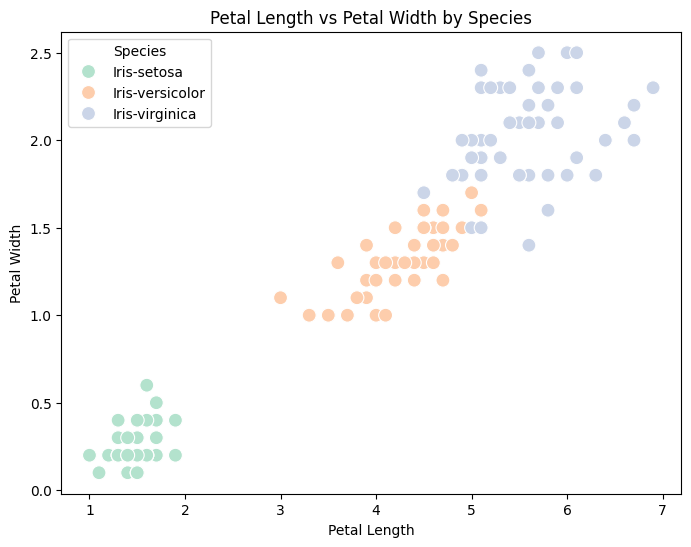

In [19]:
# Plotting Petal Length vs Petal Width by Species using scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='petal_length', y='petal_width', hue='species', palette='Pastel2', s=100)
plt.title("Petal Length vs Petal Width by Species")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend(title="Species")
plt.show()